# 1. 

In [12]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from IPython.display import display, clear_output


## Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'ryan-greiner-bucket'
bucket = s3.Bucket(bucket_name)

## Defining the file to be read from s3 bucket
file_key = 'weather.csv'
bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading CSV file
weather = pd.read_csv(file_content_stream)
weather.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


# Part a)

In [2]:
weather['hpwren_timestamp'] = pd.to_datetime(weather['hpwren_timestamp'])
weather = weather.loc[weather['hpwren_timestamp'].dt.year <= 2011]
weather = weather.loc[weather['hpwren_timestamp'].dt.month <= 10]
weather = weather.dropna()
print(np.min(weather['hpwren_timestamp']),
      np.max(weather['hpwren_timestamp']))

2011-09-10 00:01:49 2011-10-31 23:59:49


# Parts b) & c)

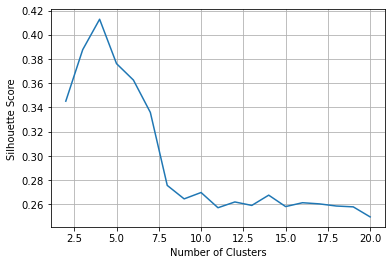

In [ ]:
silho_score = list()
scaler = MinMaxScaler()
X = pd.DataFrame()

X[['air_pressure_01', 'air_temp_01', 'avg_wind_direction_01', 'avg_wind_speed_01', 'max_wind_direction_01', 'max_wind_speed_01', 
   'relative_humidity_01']] = scaler.fit_transform(weather[['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 
                                                            'max_wind_direction', 'max_wind_speed', 'relative_humidity']])

for i in range(2, 21):
    print((i-2)/20 * 100, '%')
    kmeans_md = KMeans(n_clusters = i, n_init = 20).fit(X)
    silho_score.append(silhouette_score(X, kmeans_md.labels_))
    clear_output()

clear_output()
plt.plot(range(2, 21), silho_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [ ]:
# The ideal number of clusters is 4

# Part d)

In [5]:
final_md = KMeans(n_clusters = 4, n_init = 20).fit(X)
weather['cluster'] = final_md.labels_
cluster_0 = weather[weather['cluster'] == 0]
cluster_1 = weather[weather['cluster'] == 1]
cluster_2 = weather[weather['cluster'] == 2]
cluster_3 = weather[weather['cluster'] == 3]
cluster_0.describe()

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity,cluster
count,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.0,3428.0,3428.000000,3428.0
mean,40710.745041,916.821091,70.618139,341.355601,1.519632,20.840432,2.134656,308.016628,0.956009,0.0,0.0,33.058285,0.0
std,18803.301277,1.421600,7.339185,20.137444,1.005371,22.336000,1.273741,42.751650,0.810251,0.0,0.0,14.215578,0.0
min,346.000000,911.600000,46.220000,209.000000,0.000000,0.000000,0.100000,71.000000,0.000000,0.0,0.0,8.700000,0.0
25%,30409.750000,915.900000,66.380000,335.000000,0.700000,5.000000,1.200000,290.000000,0.300000,0.0,0.0,24.300000,0.0
50%,39652.500000,916.800000,71.420000,348.000000,1.300000,13.000000,1.900000,324.000000,0.700000,0.0,0.0,29.400000,0.0
75%,55318.250000,917.900000,76.280000,355.000000,2.100000,28.000000,2.800000,338.000000,1.500000,0.0,0.0,39.000000,0.0
max,74473.000000,920.700000,90.500000,359.000000,7.000000,141.000000,8.700000,357.000000,5.500000,0.0,0.0,90.100000,0.0


In [6]:
cluster_1.describe()

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity,cluster
count,28507.000000,28507.000000,28507.000000,28507.000000,28507.000000,28507.000000,28507.000000,28507.000000,28507.000000,28507.000000,28507.000000,28507.000000,28507.0
mean,40746.745115,917.000488,70.893727,42.649735,2.158596,58.300523,2.616392,95.158452,1.700898,0.000004,0.009471,30.415786,1.0
std,20904.128517,1.532915,6.824778,27.996697,1.324844,30.509464,1.548872,121.997478,1.126062,0.000375,0.646039,13.258024,0.0
min,2.000000,911.300000,46.040000,0.000000,0.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,4.900000,1.0
25%,24317.500000,915.700000,66.020000,20.000000,1.200000,37.000000,1.500000,21.000000,0.900000,0.000000,0.000000,21.500000,1.0
50%,44394.000000,917.200000,71.240000,40.000000,1.800000,53.000000,2.200000,42.000000,1.500000,0.000000,0.000000,28.200000,1.0
75%,56937.500000,918.200000,75.560000,58.000000,2.800000,72.000000,3.300000,84.000000,2.200000,0.000000,0.000000,35.900000,1.0
max,74332.000000,920.700000,90.680000,132.000000,8.900000,248.000000,11.000000,359.000000,7.200000,0.060000,50.000000,79.700000,1.0


In [ ]:
# cluster 0 and 1 are similar in temperature but cluster 0 contains days with higher humidity

In [7]:
cluster_2.describe()

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity,cluster
count,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.0
mean,35587.540563,917.001834,72.801651,213.749328,2.170516,231.643641,2.692678,195.993514,1.628909,0.000022,0.022258,34.316218,2.0
std,21833.659851,1.561896,5.546291,53.455629,1.306808,54.827738,1.467979,57.060744,1.187001,0.001561,1.040071,13.176596,0.0
min,1.000000,911.100000,52.520000,66.000000,0.000000,141.000000,0.100000,1.000000,0.000000,0.000000,0.000000,4.900000,2.0
25%,16650.250000,915.900000,68.720000,178.000000,1.100000,190.000000,1.500000,166.000000,0.700000,0.000000,0.000000,24.500000,2.0
50%,30901.500000,917.100000,72.500000,202.000000,2.000000,216.000000,2.500000,187.000000,1.400000,0.000000,0.000000,32.600000,2.0
75%,53842.750000,918.100000,77.000000,227.000000,3.000000,253.000000,3.600000,212.000000,2.300000,0.000000,0.000000,43.800000,2.0
max,74484.000000,920.700000,91.220000,357.000000,8.600000,359.000000,10.100000,359.000000,7.500000,0.200000,60.000000,66.200000,2.0


In [ ]:
# cluster 2 represents warm and humid days

In [8]:
cluster_3.describe()

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity,cluster
count,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.0
mean,33074.470199,915.714949,54.488234,192.784110,2.551966,203.245144,3.154655,182.181537,1.929340,0.000132,0.396334,82.101238,3.0
std,21472.431801,1.769938,5.354976,68.805296,1.899453,70.673105,2.242559,69.309324,1.608435,0.002327,4.209332,11.118350,0.0
min,4.000000,910.700000,45.320000,0.000000,0.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,47.500000,3.0
25%,10657.750000,914.700000,50.720000,172.000000,1.100000,184.000000,1.500000,160.750000,0.700000,0.000000,0.000000,71.900000,3.0
50%,35153.500000,915.700000,53.060000,196.000000,2.100000,208.000000,2.600000,187.000000,1.500000,0.000000,0.000000,89.000000,3.0
75%,57892.250000,916.900000,58.100000,226.000000,3.500000,239.000000,4.300000,213.000000,2.800000,0.000000,0.000000,91.500000,3.0
max,67119.000000,920.000000,68.900000,359.000000,23.400000,359.000000,25.900000,359.000000,21.600000,0.120000,60.000000,92.400000,3.0


In [ ]:
# cluster 3 represents cooler days

# 2. 

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from itertools import product
from sklearn.metrics import recall_score, accuracy_score

## Defining the file to be read from s3 bucket
file_key80 = 'churn-bigml-80.csv'
bucket_object80 = bucket.Object(file_key80)
file_object80 = bucket_object80.get()
file_content_stream80 = file_object80.get('Body')

file_key20 = 'churn-bigml-20.csv'
bucket_object20 = bucket.Object(file_key20)
file_object20 = bucket_object20.get()
file_content_stream20 = file_object20.get('Body')

## Reading CSV file
telecom_train = pd.read_csv(file_content_stream80)
telecom_test = pd.read_csv(file_content_stream20)
telecom_train.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Feature Engineering

In [25]:
## Churn number ##
telecom_train['Churn_numb'] = np.where(telecom_train['Churn'] == True, 1, 0)
telecom_test['Churn_numb'] = np.where(telecom_test['Churn'] == True, 1, 0)

## International plan number ##
telecom_train['International_plan'] = np.where(telecom_train['International_plan'] == 'Yes', 1, 0)
telecom_test['International_plan'] = np.where(telecom_test['International_plan'] == 'Yes', 1, 0)

## Voice mail plan number ##
telecom_train['Voice_mail_plan'] = np.where(telecom_train['Voice_mail_plan'] == 'Yes', 1, 0)
telecom_test['Voice_mail_plan'] = np.where(telecom_test['Voice_mail_plan'] == 'Yes', 1, 0)

## Total charge ##
telecom_train['total_charge'] = (telecom_train['Total_day_charge']+ 
                                 telecom_train['Total_eve_charge']+ 
                                 telecom_train['Total_night_charge']+ 
                                 telecom_train['Total_intl_charge'])
telecom_test['total_charge'] = (telecom_test['Total_day_charge']+ 
                                telecom_test['Total_eve_charge']+ 
                                telecom_test['Total_night_charge']+ 
                                telecom_test['Total_intl_charge'])

## Inputs and target ##
telecom_train = telecom_train[['Account_length',
                               'International_plan', 
                               'Voice_mail_plan', 
                               'total_charge', 
                               'Customer_service_calls', 
                               'Churn_numb']]
telecom_test = telecom_test[['Account_length', 
                             'International_plan', 
                             'Voice_mail_plan', 
                             'total_charge', 
                             'Customer_service_calls', 
                             'Churn_numb']]
X = telecom_train.drop(columns = ['Churn_numb'], axis = 1)
Y = telecom_train['Churn_numb']

## Define lists ##
rf_importance = list()
ada_importance = list()
gb_importance = list()

# Importances

In [21]:
## This part was ran in the console. See Importances.py for the code and Importances.csv for the results
for i in range(0, 3): ## run 100 times ##
    print(i, '%')
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)
    
    ## Random Forest ##
    rf_md = RandomForestClassifier(n_estimators = 500, max_depth = 3).fit(X_train, Y_train)
    rf_importance.append(rf_md.feature_importances_)
        
    ## AdaBoost ##
    ada_md = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3), 
    n_estimators = 500, learning_rate = .01).fit(X_train, Y_train)
    ada_importance.append(ada_md.feature_importances_)
        
    ## Gradient Boosting ##
    gb_md = GradientBoostingClassifier(max_depth = 3, n_estimators = 500, learning_rate = .001).fit(X_train, Y_train)
    gb_importance.append(gb_md.feature_importances_)
    clear_output()
        
## Define lists to calculate averages ##
rf_avg = list()
ada_avg = list()
gb_avg = list()

rf_avg.append(rf_importance[0])
ada_avg.append(ada_importance[0])
gb_avg.append(gb_importance[0])

## Calculate Averages ##
for i in range(1, len(rf_importance)):
    rf_avg = rf_avg + rf_importance[i]
    ada_avg = ada_avg + ada_importance[i]
    gb_avg = gb_avg + gb_importance[i]
    
rf_avg = rf_avg/len(rf_importance)
ada_avg = ada_avg/len(ada_importance)
gb_avg = gb_avg/len(gb_importance)

## Display Averages ##
pd.DataFrame({'Input Variable': ['Account_length',
                                 'International_plan', 
                                 'Voice_mail_plan', 
                                 'total_charge', 
                                 'Customer_service_calls'],
              'RF Importance': [rf_avg[0][0],
                                rf_avg[0][1],
                                rf_avg[0][2],
                                rf_avg[0][3],
                                rf_avg[0]][4],
              'Ada Importance': [ada_avg[0][0],
                                 ada_avg[0][1],
                                 ada_avg[0][2],
                                 ada_avg[0][3],
                                 ada_avg[0]][4],
              'GB Importance': [gb_avg[0][0],
                                gb_avg[0][1],
                                gb_avg[0][2],
                                gb_avg[0][3],
                                gb_avg[0][4]]})

1 %


KeyboardInterrupt: 

In [26]:
# The least important variable is Account_length
X = X.drop(columns = 'Account_length', axis = 1)

# Model Selection

In [15]:
## This section was run through the console. see Model_Selection.py for the code and the files results.csv and rf_results.csv for the results.
## Parameters for Random Forest ##
def expand_grid(rf_dictionary):
    return pd.DataFrame([row for row in product(*rf_dictionary.values())], columns = rf_dictionary.keys())
rf_dictionary = {'n_tree': [100, 500, 1000, 1500, 2000], 'depth': [3, 5, 7]}
rf_parameters = expand_grid(rf_dictionary)

## Parameters for AdaBoost ##
def expand_grid(dictionary):
    return pd.DataFrame([row for row in product(*dictionary.values())],columns = dictionary.keys())
dictionary = {'n_tree': [100, 500, 1000, 1500, 2000], 'depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001]}
ada_parameters = expand_grid(dictionary)

## Parameters for Gradient Boosting ##
gb_parameters = expand_grid(dictionary)

## Create data frames for results ##
rf_recall, rf_accuracy = pd.DataFrame(), pd.DataFrame()
ada_recall, ada_accuracy = pd.DataFrame(), pd.DataFrame()
gb_recall, gb_accuracy = pd.DataFrame(), pd.DataFrame()

for j in range(1, 3): # Run 100 times use range(1, 101)
    print((j-1),'%')
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)
    
    ## Prepare data frames for results ##
    rf_recall[str(j)] = np.nan
    ada_recall[str(j)] = np.nan
    gb_recall[str(j)] = np.nan
    
    rf_accuracy[str(j)] = np.nan
    ada_accuracy[str(j)] = np.nan
    gb_accuracy[str(j)] = np.nan
    
    for i in range(0, len(rf_parameters)):
        
        ## Random Forest ##
        rf_md = RandomForestClassifier(n_estimators = rf_parameters.loc[i, 'n_tree'], 
                                       max_depth = rf_parameters.loc[i, 'depth']).fit(X_train, Y_train)
        
        rf_pred = rf_md.predict_proba(X_test)[:, 1]
        rf_label = np.where(rf_pred < .1, 0, 1)
        
        ## Store Results ##
        rf_recall.loc[i, str(j)] = recall_score(Y_test, rf_label)
        rf_accuracy.loc[i, str(j)] = accuracy_score(Y_test, rf_label)

    for i in range(0, len(ada_parameters)):
        
        ## AdaBoost ##
        ada_md = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = ada_parameters.loc[i, 'depth']), 
                                    n_estimators = ada_parameters.loc[i, 'n_tree'], 
                                    learning_rate = ada_parameters.loc[i, 'learning_rate']).fit(X_train, Y_train)
        
        ada_pred = ada_md.predict_proba(X_test)[:, 1]
        ada_label = np.where(ada_pred < .1, 0, 1)
        
        ## Store Results ##
        ada_recall.loc[i, str(j)] = recall_score(Y_test, ada_label)
        ada_accuracy.loc[i, str(j)] = accuracy_score(Y_test, ada_label)

        ## Gradient Boosting ##
        gb_md = GradientBoostingClassifier(max_depth = gb_parameters.loc[i, 'depth'], n_estimators = gb_parameters.loc[i, 'n_tree'],
                                           learning_rate = gb_parameters.loc[i, 'learning_rate']).fit(X_train, Y_train)
        
        gb_pred = gb_md.predict_proba(X_test)[:, 1]
        gb_label = np.where(gb_pred < .1, 0, 1)
        
        ## Store Results
        gb_recall.loc[i, str(j)] = recall_score(Y_test, gb_label)
        gb_accuracy.loc[i, str(j)] = accuracy_score(Y_test, gb_label)
    clear_output()
## Compute Averages and display results
rf_results = rf_parameters
rf_results['RF Recall'] = rf_recall.mean(axis = 1)
rf_results['RF Accuracy'] = rf_accuracy.mean(axis = 1)
results = ada_parameters
results['Ada Recall'] = ada_recall.mean(axis = 1)
results['Ada Accuracy'] = ada_accuracy.mean(axis = 1)
results['GB Recall'] = gb_recall.mean(axis = 1)
results['GB Accuracy'] = gb_accuracy.mean(axis = 1)

display(rf_results)
display(results)

,n_tree,depth,RF Recall,RF Accuracy
0,100,3,0.871795,0.865169
1,100,5,0.871795,0.868914
2,100,7,0.871795,0.893258
3,500,3,0.871795,0.866105
4,500,5,0.871795,0.867041
5,500,7,0.871795,0.896067
6,1000,3,0.871795,0.867041
7,1000,5,0.871795,0.867041
8,1000,7,0.871795,0.894195
9,1500,3,0.871795,0.867041


,n_tree,depth,learning_rate,Ada Recall,Ada Accuracy,GB Recall,GB Accuracy
0,100,3,0.100,1.000000,0.147004,0.865385,0.915730
1,100,3,0.010,0.884615,0.832397,0.871795,0.926030
2,100,3,0.001,0.858974,0.891386,1.000000,0.146067
3,100,5,0.100,0.865385,0.637640,0.833333,0.896067
4,100,5,0.010,0.820513,0.851124,0.871795,0.922285
5,100,5,0.001,0.846154,0.923221,1.000000,0.146067
6,100,7,0.100,0.717949,0.930712,0.801282,0.906367
7,100,7,0.010,0.743590,0.928839,0.871795,0.918539
8,100,7,0.001,0.775641,0.932584,1.000000,0.146067
9,500,3,0.100,1.000000,0.146067,0.833333,0.897004


In [ ]:
# Selection Process
# RF: lower depth yeilds slightly higher recall with lower accuracy
#     higher depth yeilds a slightly lower recall with higer accuracy
#     more trees gives a slight increase to accuracy

#     We want a high recall but dont want to sacrifice accuracy. Thus I believe the best model uses 2000 trees and a depth of 5.

# Ada and GB: 
# learning rate of .1 yeilds high recall but very low accuracy
# depth of 7 yeilds a low recall
# now drop depth = 5 & learning rate = .001
# now drop depth = 3 & learning rate = .01

# keeping in mind that I want a higher recall without sacrificing accuracy. I chose to use the model with 1000 trees, depth of 3, and learning rate of .001
# for GB i chose the model with 2000 trees, depth of 3, and learning rate of .001


# Final Models

In [32]:
## PART G ##
# DataFrames:
# X, Y = telecom_train
# telecom_test
Y_telecom_test = telecom_test['Churn_numb']
X_telecom_test = telecom_test.drop(columns = ['Churn_numb', 'Account_length'], axis = 1)
best_rf_recall = 0.866666
best_ada_recall = 0.874872
best_gb_recall = 0.852179
## Final Random Forest ##
final_rf_md = RandomForestClassifier(n_estimators = 2000, max_depth = 5).fit(X, Y)
final_rf_pred = final_rf_md.predict_proba(X_telecom_test)[:, 1]

## Final AdaBoost
final_ada_md = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3), n_estimators = 1000, learning_rate = .001).fit(X, Y)
final_ada_pred = final_ada_md.predict_proba(X_telecom_test)[:, 1]

## Final Gradient Boosting ##
final_gb_md = GradientBoostingClassifier(max_depth = 3, n_estimators = 2000, learning_rate = .001).fit(X, Y)
final_gb_pred = final_gb_md.predict_proba(X_telecom_test)[:, 1]

## Aggregate Results ##
final_pred = ((best_rf_recall/(best_rf_recall + best_ada_recall + best_gb_recall))*final_rf_pred+
              (best_ada_recall/(best_rf_recall + best_ada_recall + best_gb_recall))*final_ada_pred+
              (best_gb_recall/(best_rf_recall + best_ada_recall + best_gb_recall))*final_gb_pred)

final_label = np.where(final_pred < .1, 0, 1)

pd.DataFrame({'Recall': [recall_score(Y_telecom_test, final_label)],
              'Accuracy': [accuracy_score(Y_telecom_test, final_label)]})

,Recall,Accuracy
0,0.884211,0.923538
